# **Import Libraries**

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# **Load,Read Dataset**

In [70]:
df=pd.read_csv('/content/blood_donation.csv')

In [71]:
df.head()

,Donor_ID,Full_Name,Gender,Age,Blood_Group,Contact_Number,Email,City,State,Country,Last_Donation_Date,Total_Donations,Eligible_for_Donation,Medical_Condition,Weight_kg,Hemoglobin_g_dL,Donation_Center,Registration_Date
0,DNR000001,Sangeeta Menon,Female,38,O+,1819600042,sangeeta.menon8280@gmail.com,Kolkata,West Bengal,India,07-10-2025,1,Yes,NaN,66.6,13.6,Red Cross Blood Bank,02-07-2021
1,DNR000002,Meena Iyer,Female,49,B+,265423420,meena.iyer6225@gmail.com,Jaipur,Rajasthan,India,08-11-2020,1,No,Hypertension,70.8,14.0,Metro Blood Bank,03-03-2023
2,DNR000003,Priya Nair,Female,29,B+,1849593012,priya.nair4742@gmail.com,Gurgaon,Haryana,India,12-04-2025,2,No,Diabetes,73.4,12.5,Fortis Blood Bank,15-10-2015
3,DNR000004,Vijay Kapoor,Male,29,O+,3419283185,vijay.kapoor4423@gmail.com,Thiruvananthapuram,Kerala,India,21-02-2025,1,Yes,NaN,57.9,14.8,NABL Blood Centre,09-05-2022
4,DNR000005,Rahul Iyer,Male,27,A+,6413953676,rahul.iyer2341@gmail.com,Bhopal,Madhya Pradesh,India,18-04-2024,1,Yes,NaN,74.0,17.1,NABL Blood Centre,13-07-2022


In [72]:
df.tail()

,Donor_ID,Full_Name,Gender,Age,Blood_Group,Contact_Number,Email,City,State,Country,Last_Donation_Date,Total_Donations,Eligible_for_Donation,Medical_Condition,Weight_kg,Hemoglobin_g_dL,Donation_Center,Registration_Date
9995,DNR009996,Anjali Naidu,Female,33,O+,6657949468,anjali.naidu1428@gmail.com,Bengaluru,Karnataka,India,30-11-2023,1,Yes,NaN,74.6,14.2,Apollo Hospitals Blood Bank,29-05-2015
9996,DNR009997,Neha Sharma,Female,21,AB-,2033970703,neha.sharma1371@gmail.com,Delhi,Delhi,India,02-10-2025,2,No,Diabetes,70.7,13.7,Metro Blood Bank,30-12-2017
9997,DNR009998,Nisha Iyer,Female,39,O+,4183958332,nisha.iyer1956@gmail.com,Kolkata,West Bengal,India,12-07-2025,2,Yes,NaN,70.5,13.3,Apollo Hospitals Blood Bank,16-04-2016
9998,DNR009999,Siddharth Menon,Male,35,B+,3105927220,siddharth.menon6401@gmail.com,Vadodara,Gujarat,India,09-11-2021,1,Yes,NaN,66.4,14.9,Government Blood Bank,24-05-2020
9999,DNR010000,Ravi Reddy,Male,40,O+,7268909356,ravi.reddy5392@gmail.com,Visakhapatnam,Andhra Pradesh,India,21-12-2022,2,Yes,NaN,56.9,12.8,Corporate Health Centre,05-05-2015


In [5]:
df.shape

(10000, 18)

# EDA (Exploratory Data Analysis)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Donor_ID               10000 non-null  object 
 1   Full_Name              10000 non-null  object 
 2   Gender                 10000 non-null  object 
 3   Age                    10000 non-null  int64  
 4   Blood_Group            10000 non-null  object 
 5   Contact_Number         10000 non-null  int64  
 6   Email                  10000 non-null  object 
 7   City                   10000 non-null  object 
 8   State                  10000 non-null  object 
 9   Country                10000 non-null  object 
 10  Last_Donation_Date     10000 non-null  object 
 11  Total_Donations        10000 non-null  int64  
 12  Eligible_for_Donation  10000 non-null  object 
 13  Medical_Condition      2195 non-null   object 
 14  Weight_kg              10000 non-null  float64
 15  Hem

In [7]:
df.describe()

,Age,Contact_Number,Total_Donations,Weight_kg,Hemoglobin_g_dL
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.00000
mean,33.897800,5.028221e+09,2.084800,68.015560,13.73798
std,9.417071,2.876037e+09,1.324003,10.014265,1.26601
min,18.000000,3.639000e+05,0.000000,45.000000,10.00000
25%,27.000000,2.538943e+09,1.000000,61.100000,12.80000
50%,34.000000,5.060247e+09,2.000000,67.900000,13.70000
75%,40.000000,7.494996e+09,3.000000,74.900000,14.60000
max,65.000000,9.998636e+09,9.000000,110.000000,18.00000


In [8]:
df.isnull().sum()

,0
Donor_ID,0
Full_Name,0
Gender,0
Age,0
Blood_Group,0
Contact_Number,0
Email,0
City,0
State,0
Country,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [ ]:
print(df['Donation_Year'].unique())
print(df['Donation_Month'].unique())

In [ ]:
df['Country'].nunique()

In [ ]:
df['Donation_Center'].unique()

In [ ]:
df.drop(columns=['Full_Name','Contact_Number','Email','Country','Donor_ID'], inplace=True)

In [10]:
df['Last_Donation_Date'] = pd.to_datetime(df['Last_Donation_Date'],format='%d-%m-%Y', errors='coerce')
df['Donation_Year'] = df['Last_Donation_Date'].dt.year

df['Donation_Month'] = df['Last_Donation_Date'].dt.month

# **Data Analysis**

In [15]:
df.head()

,Gender,Age,Blood_Group,City,State,Last_Donation_Date,Total_Donations,Eligible_for_Donation,Medical_Condition,Weight_kg,Hemoglobin_g_dL,Donation_Center,Registration_Date,Donation_Year,Donation_Month
0,Female,38,O+,Kolkata,West Bengal,2025-10-07,1,Yes,NaN,66.6,13.6,Red Cross Blood Bank,02-07-2021,2025.0,10.0
1,Female,49,B+,Jaipur,Rajasthan,2020-11-08,1,No,Hypertension,70.8,14.0,Metro Blood Bank,03-03-2023,2020.0,11.0
2,Female,29,B+,Gurgaon,Haryana,2025-04-12,2,No,Diabetes,73.4,12.5,Fortis Blood Bank,15-10-2015,2025.0,4.0
3,Male,29,O+,Thiruvananthapuram,Kerala,2025-02-21,1,Yes,NaN,57.9,14.8,NABL Blood Centre,09-05-2022,2025.0,2.0
4,Male,27,A+,Bhopal,Madhya Pradesh,2024-04-18,1,Yes,NaN,74.0,17.1,NABL Blood Centre,13-07-2022,2024.0,4.0


In [16]:
df.groupby("Gender")['Blood_Group'].value_counts()

Gender  Blood_Group
Female  O+             1863
        B+             1567
        A+              916
        O-              210
        AB+             192
        A-              100
        B-               89
        AB-              49
Male    O+             1827
        B+             1540
        A+              903
        O-              204
        AB+             172
        A-              106
        B-              103
        AB-              51
Other   O+               39
        B+               29
        A+               23
        AB+               7
        O-                5
        A-                2
        B-                2
        AB-               1
Name: count, dtype: int64

| Blood Type | Can Donate To    | Can Receive From |
| ---------- | ---------------- | ---------------- |
| **O-**     | All types        | O-               |
| **O+**     | O+, A+, B+, AB+  | O-, O+           |
| **A-**     | A-, A+, AB-, AB+ | A-, O-           |
| **A+**     | A+, AB+          | A+, A-, O+, O-   |
| **B-**     | B-, B+, AB-, AB+ | B-, O-           |
| **B+**     | B+, AB+          | B+, B-, O+, O-   |
| **AB-**    | AB-, AB+         | AB-, A-, B-, O-  |
| **AB+**    | AB+              | All types        |


Reasons for Blood Type Distribution in India

Genetic reason:
O+ and B+ are more common among the population, A+ is less common, and AB+ is rare.

Compatibility reason:
O+ can donate to most positive blood types → appears more in donations.
AB+ can donate only to AB → appears less in donations.

/tmp/ipython-input-1275801138.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Blood_Group', palette=['#440154', '#31688E', '#35B779', '#FDE725', '#F46D43', '#5C4D7D', '#C51B7D', '#FDE0A4'])


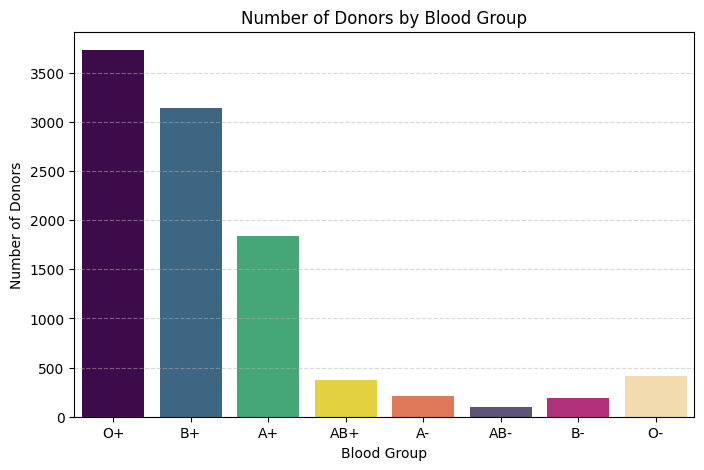

In [17]:
plt.figure(figsize=(8,5))

sns.countplot(data=df, x='Blood_Group', palette=['#440154', '#31688E', '#35B779', '#FDE725', '#F46D43', '#5C4D7D', '#C51B7D', '#FDE0A4'])

plt.title('Number of Donors by Blood Group')
plt.xlabel('Blood Group')
plt.ylabel('Number of Donors')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


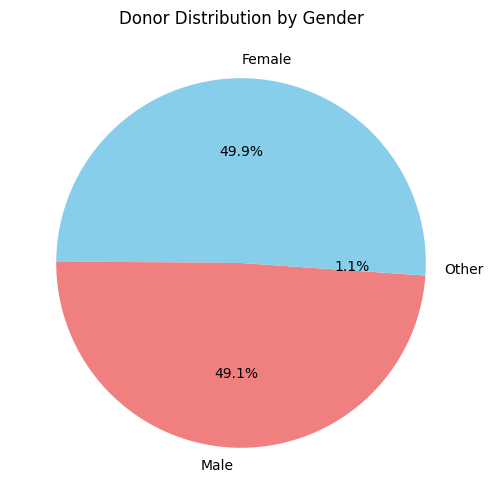

In [18]:

donor_counts = df.groupby('Gender')['Blood_Group'].count()

plt.figure(figsize=(6,6))
plt.pie(donor_counts, labels=donor_counts.index, autopct='%1.1f%%', colors=['skyblue','lightcoral'])
plt.title('Donor Distribution by Gender')
plt.show()


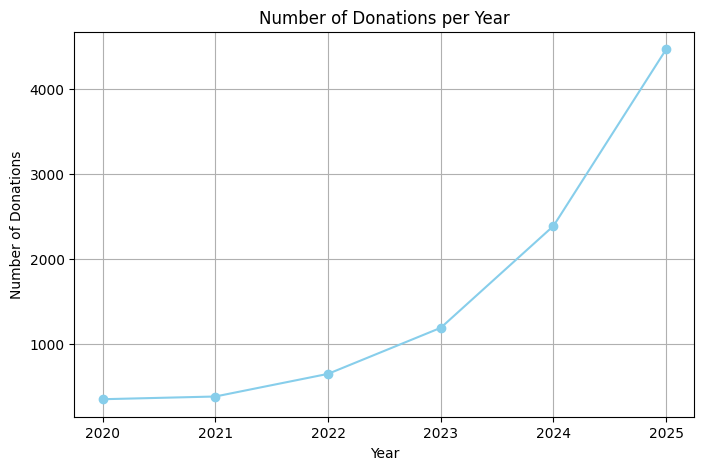

In [19]:
donation_per_year = df.groupby('Donation_Year')['Blood_Group'].count()

plt.figure(figsize=(8,5))
donation_per_year.plot(kind='line', marker='o', color='skyblue')
plt.title('Number of Donations per Year')
plt.xlabel('Year')
plt.ylabel('Number of Donations')
plt.xticks(donation_per_year.index)
plt.grid(True)
plt.show()

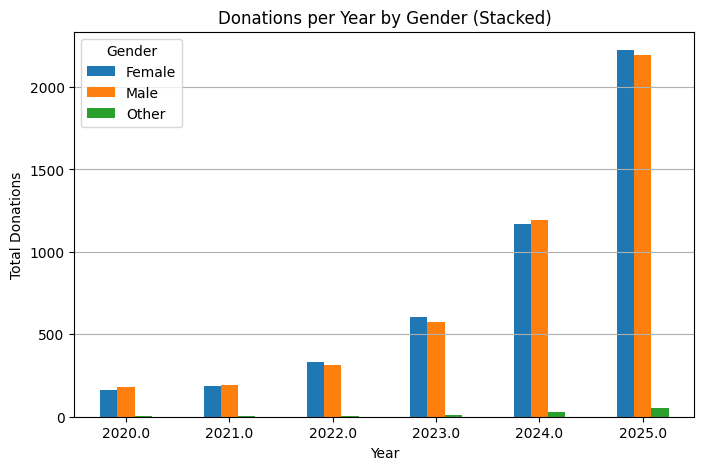

In [20]:
gender_year = df.groupby("Donation_Year")['Gender'].value_counts().unstack(fill_value=0)

gender_year.plot(kind='bar', figsize=(8,5))
plt.title("Donations per Year by Gender (Stacked)")
plt.xlabel("Year")
plt.ylabel("Total Donations")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


| Gender | Normal Hemoglobin (g/dL) |
| ------ | ------------------------ |
| Men    | 13.8 – 17.2              |
| Women  | 12.1 – 15.1              |


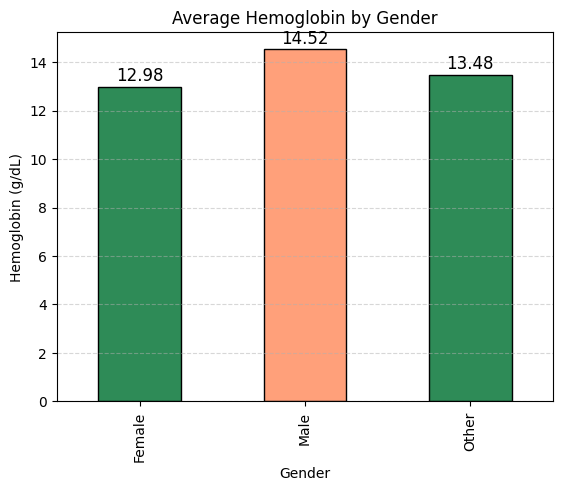

In [21]:

mean_hb = df.groupby('Gender')['Hemoglobin_g_dL'].mean()

ax = mean_hb.plot(kind='bar', color=['#2E8B57', '#FFA07A'], edgecolor='black')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 0.1, f'{height:.2f}',
            ha='center', va='bottom', fontsize=12, color='black')

plt.title('Average Hemoglobin by Gender')
plt.ylabel('Hemoglobin (g/dL)')
plt.xlabel('Gender')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


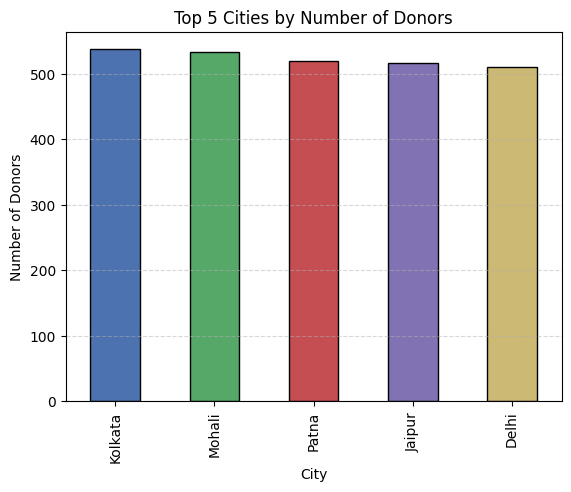

In [22]:

top_cities = df.groupby("City")['Blood_Group'].count().sort_values(ascending=False).head()

ax = top_cities.plot(kind='bar', color=['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974'], edgecolor='black')

plt.title('Top 5 Cities by Number of Donors')
plt.xlabel('City')
plt.ylabel('Number of Donors')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


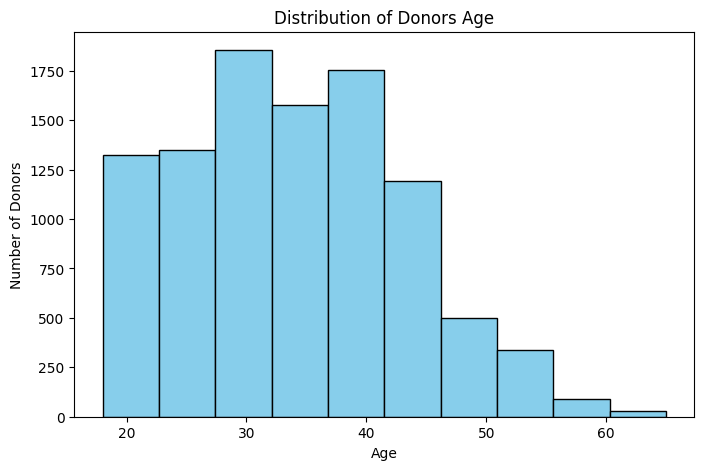

In [23]:

plt.figure(figsize=(8,5))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Donors Age')
plt.xlabel('Age')
plt.ylabel('Number of Donors')
plt.show()


/tmp/ipython-input-581101126.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Blood_Group', y='Age', palette='Set2')


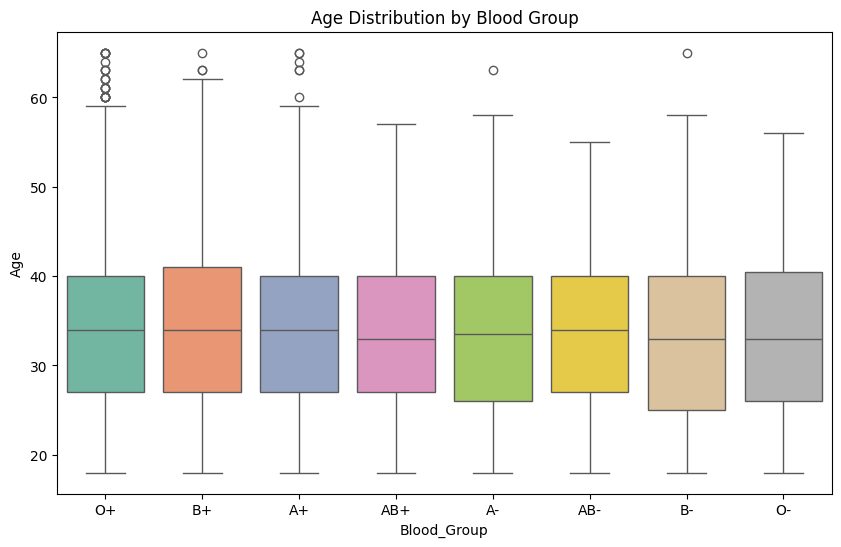

In [24]:

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Blood_Group', y='Age', palette='Set2')
plt.title('Age Distribution by Blood Group')
plt.show()


<Axes: xlabel='Weight_kg', ylabel='Hemoglobin_g_dL'>

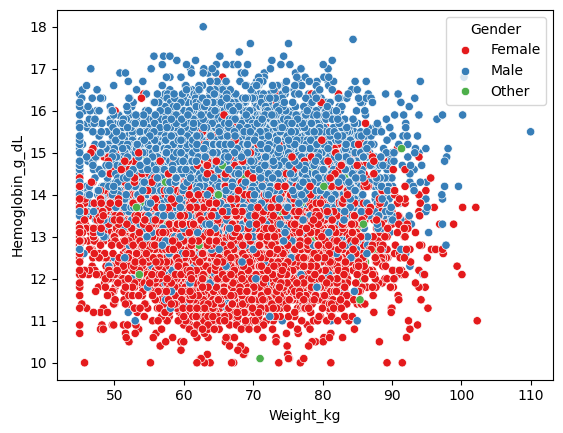

In [25]:
sns.scatterplot(data=df, x='Weight_kg', y='Hemoglobin_g_dL', hue='Gender', palette='Set1')


<Axes: >

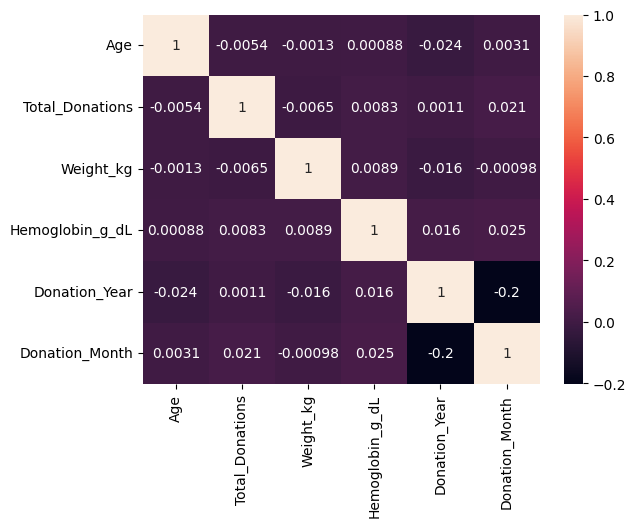

In [26]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [27]:
df.head()

,Gender,Age,Blood_Group,City,State,Last_Donation_Date,Total_Donations,Eligible_for_Donation,Medical_Condition,Weight_kg,Hemoglobin_g_dL,Donation_Center,Registration_Date,Donation_Year,Donation_Month
0,Female,38,O+,Kolkata,West Bengal,2025-10-07,1,Yes,NaN,66.6,13.6,Red Cross Blood Bank,02-07-2021,2025.0,10.0
1,Female,49,B+,Jaipur,Rajasthan,2020-11-08,1,No,Hypertension,70.8,14.0,Metro Blood Bank,03-03-2023,2020.0,11.0
2,Female,29,B+,Gurgaon,Haryana,2025-04-12,2,No,Diabetes,73.4,12.5,Fortis Blood Bank,15-10-2015,2025.0,4.0
3,Male,29,O+,Thiruvananthapuram,Kerala,2025-02-21,1,Yes,NaN,57.9,14.8,NABL Blood Centre,09-05-2022,2025.0,2.0
4,Male,27,A+,Bhopal,Madhya Pradesh,2024-04-18,1,Yes,NaN,74.0,17.1,NABL Blood Centre,13-07-2022,2024.0,4.0


# **Feature Engineering**

In [31]:
label_cols = ['Gender', 'Blood_Group', 'City', 'State',  'Eligible_for_Donation']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col].astype(str))


# **Data Splitting**

In [32]:

X = df[['Age', 'Gender', 'Weight_kg', 'Hemoglobin_g_dL',
        'Total_Donations', 'Blood_Group']]
y = df['Eligible_for_Donation']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Model Training**

In [55]:
model_R = RandomForestClassifier()
model_D= DecisionTreeClassifier()
model_L= LogisticRegression()
model_K= KNeighborsClassifier()
model_S= SVC()
all_model=[model_R,model_D,model_L,model_K,model_S]

# **The best model is RandomForestClassifier**

# **Model Evaluation**

In [56]:
def Test(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'The Model is :{model},',"Accuracy:", accuracy_score(y_test, y_pred))

In [58]:
for i in all_model:
  Test(i)

The Model is :RandomForestClassifier(), Accuracy: 0.833
The Model is :DecisionTreeClassifier(), Accuracy: 0.722
The Model is :LogisticRegression(), Accuracy: 0.7785
The Model is :KNeighborsClassifier(), Accuracy: 0.7265
The Model is :SVC(), Accuracy: 0.7345


# **Testing on New Data**

In [81]:

# --- 1) New Data ---
new_data = pd.DataFrame([
    [31, "Male", "O+", 72, 15.0, 3],
    [26, "Female", "A+", 55, 11.2, 1],
    [45, "Male", "B+", 80, 14.3, 4],
    [22, "Male", "O-", 68, 16.1, 2],
    [34, "Female", "AB+", 63, 12.3, 1]
], columns=["Age","Gender","Blood_Group","Weight_kg","Hemoglobin_g_dL","Total_Donations"])

label_cols = ['Gender', 'Blood_Group']
encoders = {}

for col in label_cols:
    le = LabelEncoder()
    le.fit(df[col].astype(str))
    encoders[col] = le
    new_data[col] = le.transform(new_data[col].astype(str))

# --- 3) Select features ---
X_new = new_data[['Age','Gender','Weight_kg','Hemoglobin_g_dL','Total_Donations','Blood_Group']]


predictions = model_R.predict(X_new)

result_df = new_data.copy()
result_df['Prediction'] = ["Eligible" if val==1 else "Not Eligible" for val in predictions]


result_df['Gender'] = encoders['Gender'].inverse_transform(result_df['Gender'])
result_df['Blood_Group'] = encoders['Blood_Group'].inverse_transform(result_df['Blood_Group'])


print("Predictions for New Data with Details:")
(result_df)





Predictions for New Data with Details:


,Age,Gender,Blood_Group,Weight_kg,Hemoglobin_g_dL,Total_Donations,Prediction
0,31,Male,O+,72,15.0,3,Eligible
1,26,Female,A+,55,11.2,1,Not Eligible
2,45,Male,B+,80,14.3,4,Eligible
3,22,Male,O-,68,16.1,2,Eligible
4,34,Female,AB+,63,12.3,1,Not Eligible


| Factor             | Observation / Insight                                                       |
| ------------------ | --------------------------------------------------------------------------- |
| Hemoglobin (Hb)    | Normal or high Hb → Eligible; Low Hb → Not Eligible. Most important factor. |
| Gender             | Males more likely to be eligible due to higher normal Hb.                   |
| Age                | Age 20-50 does not affect eligibility if Hb is normal.                      |
| Blood Group        | No clear impact on eligibility in this example.                             |
| Weight & Donations | Adequate weight and moderate number of donations increase eligibility.      |
